In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats as st
import numpy as np

In [2]:
df=pd.read_csv('summer_camp_data.xls.csv', encoding='latin-1')
df.head(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Íå îïðåäåëåíî,Äåñêòîï,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Íå îïðåäåëåíî,Ìîáàéë,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Íå îïðåäåëåíî,Ìîáàéë,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Íå îïðåäåëåíî,Äåñêòîï,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Íå îïðåäåëåíî,Äåñêòîï,no,no,2159,1000,4110,824,351,62,61861.0


In [3]:
#удаление корявых столбцов 
df=df.drop(['delivery_available', 'device_type'], axis=1)
df

,date,source,medium,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,no,no,2159,1000,4110,824,351,62,61861.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52719,2020-06-21,(direct),(none),yes,yes,65,4,250,50,58,4,4821.0
52720,2020-08-09,co-promo,email,no,no,43,2,250,50,23,1,7348.0
52721,2020-09-22,google,cpc,yes,yes,153,3,250,50,58,1,958.0
52722,2020-08-25,(direct),(none),yes,yes,219,8,250,50,45,1,828.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 12 columns):
date               52724 non-null object
source             52724 non-null object
medium             52724 non-null object
promo_activated    52724 non-null object
filter_used        52724 non-null object
pageviews          52724 non-null int64
visits             52724 non-null int64
productClick       52724 non-null int64
addToCart          52724 non-null int64
checkout           52724 non-null int64
transactions       52724 non-null int64
revenue            52724 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 4.8+ MB


In [5]:
#нужно сделать столбец даты в формате datetime,а не object
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 12 columns):
date               52724 non-null datetime64[ns]
source             52724 non-null object
medium             52724 non-null object
promo_activated    52724 non-null object
filter_used        52724 non-null object
pageviews          52724 non-null int64
visits             52724 non-null int64
productClick       52724 non-null int64
addToCart          52724 non-null int64
checkout           52724 non-null int64
transactions       52724 non-null int64
revenue            52724 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 4.8+ MB


,date,source,medium,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,no,no,2159,1000,4110,824,351,62,61861.0


#### а) Какой рекламный канал принёс больше всего дохода за всё время?

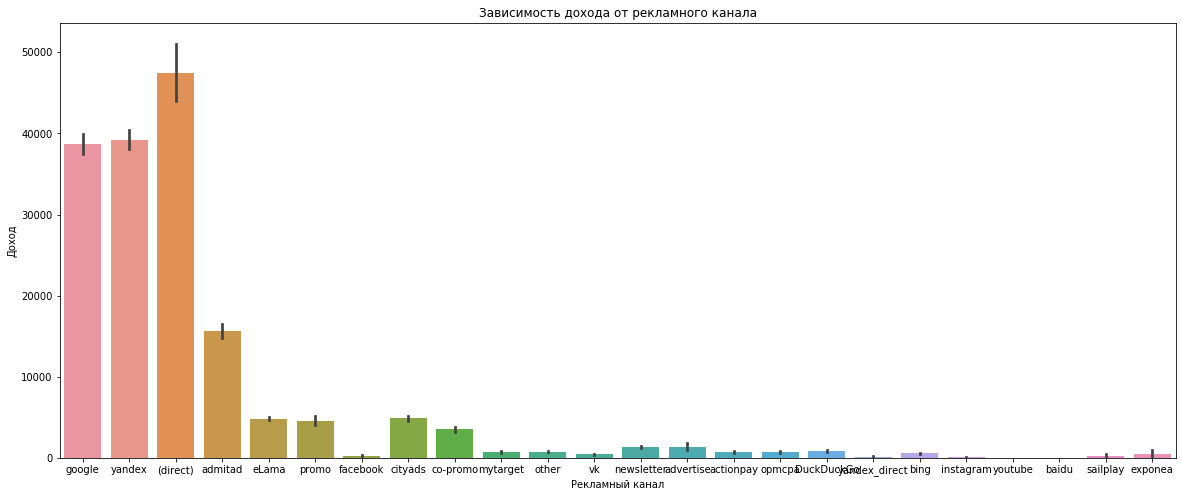

In [6]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='source', y='revenue')
plt.xlabel('Рекламный канал')
plt.ylabel('Доход')
plt.title('Зависимость дохода от рекламного канала')
plt.show()

В результате видим, что рекламный канал, который дал наибольший доход это direct

#### b) Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

Будем считать датой введения коронавирусных ограничений 30 марта, когда официально запретили выходить из дома в Москве и Подмосковье (источник википедия)

In [14]:
covid = '2020-03-30' #запишем как дату начала ковидных ограничений
before = df.query('date < @covid') #выделим период до этой даты
after = df.query('date >= @covid') #и после

x = before['checkout'].mean()
y = after['checkout'].mean()
print('Средний чек до ковидных ограничений: ', x)
print('Средний чек после введения ковидных ограничений: ', y)

Средний чек до ковидных ограничений:  116.17988624289018
Средний чек после введения ковидных ограничений:  159.8431586113002


In [13]:
without_promo = df[df['promo_activated'] == 'no'] #строки данных без применения промокода
with_promo = df[df['promo_activated'] == 'yes'] #с применением промокода

without_mean = without_promo['checkout'].mean()
with_mean = with_promo['checkout'].mean()
print('Средний чек без активации промокода: ', without_mean)
print('Средний чек c активацией промокода: ', with_mean)

Средний чек без активации промокода:  107.866320641719
Средний чек c активацией промокода:  188.9793429468081


В результате видим, что средний чек увеличился после введения короновирусных ограничений. При этом получилось, что средний чек выше, если пользователь применил промокод.

#### c) Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

Здесь сначала было решено вывести отдельно будни и выходные и записать это в отдельный столбец дня недели. После этого провести бутстреп для определения 95% доверительного интервала.

In [42]:
df['weekday'] = df['date'].dt.weekday_name

df.head()

,date,source,medium,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,weekday
0,2020-05-11,google,organic,no,no,3120,1233,5240,1048,525,90,86649.0,Monday
1,2020-05-11,yandex,cpc,yes,no,3302,544,9930,1984,1416,217,244478.0,Monday
2,2020-05-11,google,cpc,no,no,2970,1450,5460,1090,599,100,105150.0,Monday
3,2020-05-11,google,cpc,no,no,1875,854,4250,848,407,71,79003.0,Monday
4,2020-05-11,yandex,organic,no,no,2159,1000,4110,824,351,62,61861.0,Monday


In [39]:
import random 
from scipy import stats as st
from scipy.stats import t

In [40]:
#создаем функцию для создания репликации выборок для одномерного масссива:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [ ]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df, np.mean)
    
np.percentile(df, [2.5, 97.5])

#### d) Вам необходимо спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. Опишите, как бы вы подошли к этой задаче и какие дополнительные данные вам понадобятся?

Нужно будет использовать алгоритмы регрессии для предсказания этого показателя. Из основных этапов можно выделить разделение датасета на выборки, оценка важности факторов и удаление не нужных. Построение и настройка моделей, кросс-валидация и оценка метрики.